## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.587701 -1.149601  0.020028  0.745518 -0.984552 -0.306849
1 -1.019379 -0.108787  0.185960  0.353478 -1.396754 -1.153416
2 -0.580125 -0.413857 -1.245053 -0.852004  0.438845 -0.392616
3 -0.715030  0.908192  0.062630  1.227958  0.518956  0.839236
4 -1.461836  1.004636 -1.228278  1.546042  0.774588  0.557561


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0409059	total: 57.4ms	remaining: 57.4s
1:	learn: 1.0303966	total: 58ms	remaining: 28.9s
2:	learn: 1.0218831	total: 58.4ms	remaining: 19.4s
3:	learn: 1.0126021	total: 58.9ms	remaining: 14.7s
4:	learn: 1.0052689	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9977175	total: 60ms	remaining: 9.94s
6:	learn: 0.9879543	total: 60.7ms	remaining: 8.61s
7:	learn: 0.9784526	total: 61.2ms	remaining: 7.59s
8:	learn: 0.9700738	total: 61.8ms	remaining: 6.81s
9:	learn: 0.9606147	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9526314	total: 63ms	remaining: 5.66s
11:	learn: 0.9444588	total: 63.6ms	remaining: 5.24s
12:	learn: 0.9354703	total: 64ms	remaining: 4.86s
13:	learn: 0.9284496	total: 64.6ms	remaining: 4.55s
14:	learn: 0.9215084	total: 65ms	remaining: 4.27s
15:	learn: 0.9135193	total: 65.6ms	remaining: 4.03s
16:	learn: 0.9051988	total: 66ms	remaining: 3.82s
17:	learn: 0.8983974	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8906030	total: 66.8ms	remaining: 3.45s
19:	

108:	learn: 0.4522642	total: 108ms	remaining: 887ms
109:	learn: 0.4493004	total: 109ms	remaining: 882ms
110:	learn: 0.4464878	total: 109ms	remaining: 877ms
111:	learn: 0.4426686	total: 110ms	remaining: 872ms
112:	learn: 0.4397998	total: 110ms	remaining: 866ms
113:	learn: 0.4367379	total: 111ms	remaining: 862ms
114:	learn: 0.4334003	total: 111ms	remaining: 857ms
115:	learn: 0.4297513	total: 112ms	remaining: 853ms
116:	learn: 0.4265814	total: 112ms	remaining: 848ms
117:	learn: 0.4235767	total: 113ms	remaining: 844ms
118:	learn: 0.4214574	total: 113ms	remaining: 839ms
119:	learn: 0.4186003	total: 114ms	remaining: 834ms
120:	learn: 0.4161610	total: 114ms	remaining: 829ms
121:	learn: 0.4136260	total: 115ms	remaining: 825ms
122:	learn: 0.4116169	total: 115ms	remaining: 820ms
123:	learn: 0.4078743	total: 115ms	remaining: 816ms
124:	learn: 0.4056169	total: 116ms	remaining: 811ms
125:	learn: 0.4028247	total: 116ms	remaining: 806ms
126:	learn: 0.4002665	total: 117ms	remaining: 802ms
127:	learn: 

271:	learn: 0.1622930	total: 186ms	remaining: 499ms
272:	learn: 0.1613511	total: 187ms	remaining: 498ms
273:	learn: 0.1604744	total: 187ms	remaining: 497ms
274:	learn: 0.1598136	total: 188ms	remaining: 495ms
275:	learn: 0.1587322	total: 188ms	remaining: 494ms
276:	learn: 0.1576613	total: 189ms	remaining: 493ms
277:	learn: 0.1568854	total: 189ms	remaining: 492ms
278:	learn: 0.1558890	total: 190ms	remaining: 491ms
279:	learn: 0.1545491	total: 191ms	remaining: 490ms
280:	learn: 0.1533415	total: 191ms	remaining: 489ms
281:	learn: 0.1524225	total: 192ms	remaining: 488ms
282:	learn: 0.1512322	total: 192ms	remaining: 487ms
283:	learn: 0.1502647	total: 193ms	remaining: 486ms
284:	learn: 0.1491045	total: 193ms	remaining: 485ms
285:	learn: 0.1483947	total: 194ms	remaining: 484ms
286:	learn: 0.1477209	total: 194ms	remaining: 482ms
287:	learn: 0.1467648	total: 194ms	remaining: 481ms
288:	learn: 0.1457649	total: 195ms	remaining: 480ms
289:	learn: 0.1447769	total: 195ms	remaining: 478ms
290:	learn: 

490:	learn: 0.0517949	total: 291ms	remaining: 302ms
491:	learn: 0.0515326	total: 292ms	remaining: 301ms
492:	learn: 0.0513231	total: 292ms	remaining: 300ms
493:	learn: 0.0511727	total: 292ms	remaining: 300ms
494:	learn: 0.0509198	total: 293ms	remaining: 299ms
495:	learn: 0.0506380	total: 293ms	remaining: 298ms
496:	learn: 0.0504080	total: 294ms	remaining: 297ms
497:	learn: 0.0501314	total: 294ms	remaining: 297ms
498:	learn: 0.0499404	total: 295ms	remaining: 296ms
499:	learn: 0.0496512	total: 295ms	remaining: 295ms
500:	learn: 0.0493677	total: 296ms	remaining: 294ms
501:	learn: 0.0491755	total: 296ms	remaining: 294ms
502:	learn: 0.0490788	total: 296ms	remaining: 293ms
503:	learn: 0.0488555	total: 297ms	remaining: 292ms
504:	learn: 0.0485931	total: 297ms	remaining: 291ms
505:	learn: 0.0484106	total: 298ms	remaining: 291ms
506:	learn: 0.0483171	total: 298ms	remaining: 290ms
507:	learn: 0.0481468	total: 299ms	remaining: 289ms
508:	learn: 0.0479554	total: 299ms	remaining: 288ms
509:	learn: 

655:	learn: 0.0278756	total: 368ms	remaining: 193ms
656:	learn: 0.0277886	total: 369ms	remaining: 193ms
657:	learn: 0.0276842	total: 370ms	remaining: 192ms
658:	learn: 0.0275407	total: 371ms	remaining: 192ms
659:	learn: 0.0274297	total: 371ms	remaining: 191ms
660:	learn: 0.0273157	total: 372ms	remaining: 191ms
661:	learn: 0.0271140	total: 372ms	remaining: 190ms
662:	learn: 0.0269191	total: 372ms	remaining: 189ms
663:	learn: 0.0268097	total: 373ms	remaining: 189ms
664:	learn: 0.0266363	total: 373ms	remaining: 188ms
665:	learn: 0.0264664	total: 374ms	remaining: 188ms
666:	learn: 0.0263860	total: 374ms	remaining: 187ms
667:	learn: 0.0263072	total: 375ms	remaining: 186ms
668:	learn: 0.0261415	total: 375ms	remaining: 186ms
669:	learn: 0.0260646	total: 376ms	remaining: 185ms
670:	learn: 0.0259894	total: 376ms	remaining: 184ms
671:	learn: 0.0259429	total: 377ms	remaining: 184ms
672:	learn: 0.0257891	total: 377ms	remaining: 183ms
673:	learn: 0.0257438	total: 377ms	remaining: 183ms
674:	learn: 

870:	learn: 0.0133667	total: 474ms	remaining: 70.2ms
871:	learn: 0.0133179	total: 475ms	remaining: 69.7ms
872:	learn: 0.0132588	total: 475ms	remaining: 69.1ms
873:	learn: 0.0132048	total: 475ms	remaining: 68.5ms
874:	learn: 0.0131753	total: 476ms	remaining: 68ms
875:	learn: 0.0131219	total: 476ms	remaining: 67.4ms
876:	learn: 0.0130929	total: 477ms	remaining: 66.9ms
877:	learn: 0.0130303	total: 477ms	remaining: 66.3ms
878:	learn: 0.0130020	total: 478ms	remaining: 65.8ms
879:	learn: 0.0129736	total: 478ms	remaining: 65.2ms
880:	learn: 0.0129128	total: 479ms	remaining: 64.6ms
881:	learn: 0.0128854	total: 479ms	remaining: 64.1ms
882:	learn: 0.0128264	total: 479ms	remaining: 63.5ms
883:	learn: 0.0127990	total: 480ms	remaining: 63ms
884:	learn: 0.0127417	total: 480ms	remaining: 62.4ms
885:	learn: 0.0127152	total: 481ms	remaining: 61.9ms
886:	learn: 0.0126888	total: 481ms	remaining: 61.3ms
887:	learn: 0.0126332	total: 482ms	remaining: 60.7ms
888:	learn: 0.0126042	total: 482ms	remaining: 60.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

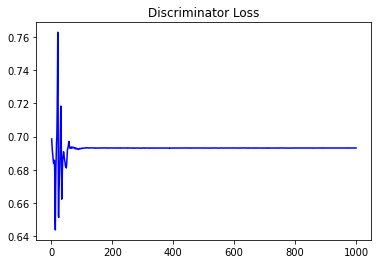

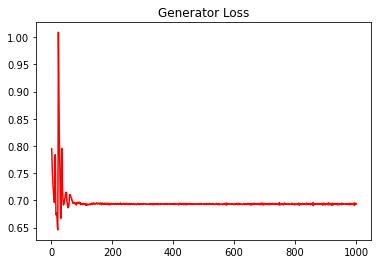

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12116683845053408


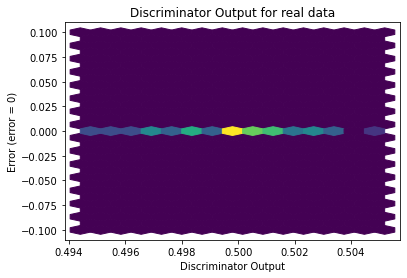

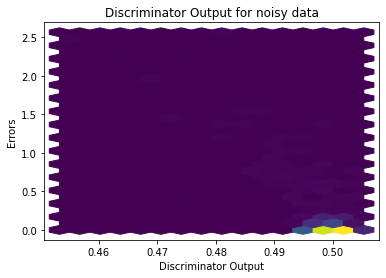

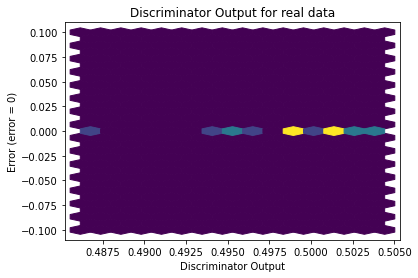

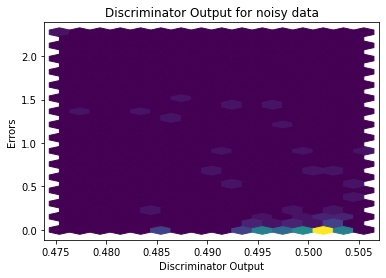

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


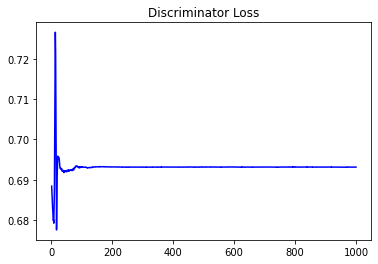

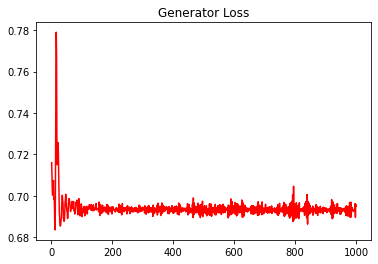

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11804035511997986


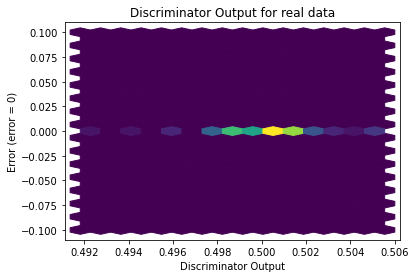

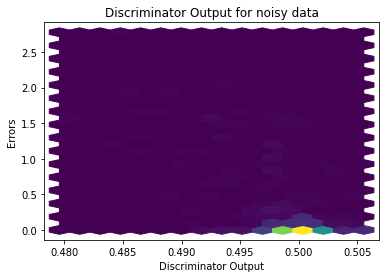

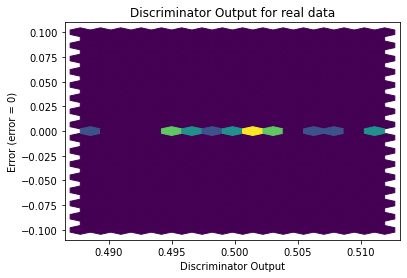

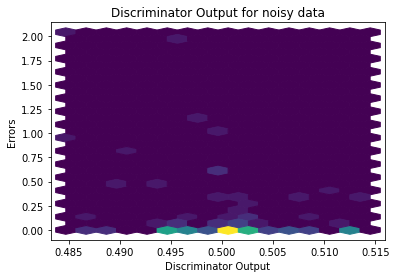

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5582]], requires_grad=True)
